# Assigment 3

Nama : Natalie Novenrodumetasa

Kode Peserta :PYTN-KS09-001

Batch : 3

**Input Variables:**

**Bank Client Data:**

- 1 - age (numeric)
- 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- 5 - default: has credit in default? (categorical: 'no','yes','unknown')
- 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
- 7 - loan: has personal loan? (categorical: 'no','yes','unknown')
- 8 - contact: contact communication type (categorical: 'cellular','telephone')
- 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). 

Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


**Other Attributes:**

- 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means - client was not previously contacted)
- 14 - previous: number of contacts performed before this campaign and for this client (numeric)
- 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
- 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
- 17 - cons.price.idx: consumer price index - monthly indicator (numeric)
- 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
- 20 - nr.employed: number of employees - quarterly indicator (numeric)


Output Variable (Desired Target):

- 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Data Preprocessing

**Import Library**

In [1]:
# Library Mengolah Data
import numpy as np
import pandas as pd 

# Library Visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
from timeit import default_timer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from six import StringIO 
from IPython.display import Image

# Supaya pesan warning tidak muncul,maka diignore
import warnings
warnings.filterwarnings('ignore')

## Preprocessing

In [2]:
pd.set_option("display.max.columns", None) 

In [3]:
# membaca dataset
df_bank = pd.read_csv('bank-additional-full.csv', sep=';')

df_bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df_bank.shape

(41188, 21)

In [6]:
df_bank.describe(include=object)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [7]:
df_bank.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [8]:
df_bank = df_bank.rename(columns={'y':'deposit'})

categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'deposit']
for cols in categorical:
    df_bank[cols] = df_bank[cols].astype('category')

In [9]:
df_bank.drop('duration', axis=1, inplace=True)

In [10]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  campaign        41188 non-null  int64   
 11  pdays           41188 non-null  int64   
 12  previous        41188 non-null  int64   
 13  poutcome        41188 non-null  category
 14  emp.var.rate    41188 non-null  float64 
 15  cons.price.idx  41188 non-null  float64 
 16  cons.conf.idx   41188 non-null  float64 
 17  euribor3m   

**Mengecek Duplikasi Data**

In [11]:
df_bank.duplicated().sum()

1784

In [12]:
df_bank.drop_duplicates()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


**Mengecek Missing Values**

In [13]:
df_bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

In [14]:
df_bank[df_bank[df_bank.columns]=='unknown'].count().sort_values(ascending=False) 

default           8597
education         1731
housing            990
loan               990
job                330
marital             80
age                  0
poutcome             0
nr.employed          0
euribor3m            0
cons.conf.idx        0
cons.price.idx       0
emp.var.rate         0
campaign             0
previous             0
pdays                0
day_of_week          0
month                0
contact              0
deposit              0
dtype: int64

In [15]:
# Mengganti 'unknown' dengan Numpy nan
df_bank[df_bank[df_bank.columns]=='unknown']=np.nan

## Exploratory Data Analysis

In [16]:
df_bank.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [17]:
df_bank.rename(columns={
    'default':'credit default',
    'pdays':'number of days passed',
    'emp.var.rate':'employment variation rate',
    'cons.price.idx':'consumer price index',
    'cons.conf.idx':'consumer confidence index',
    'euribor3m':'euribor 3 month rate',
    'nr.employed':'number of employees',
}, inplace=True)

df_bank.head()

,age,job,marital,education,credit default,housing,loan,contact,month,day_of_week,campaign,number of days passed,previous,poutcome,employment variation rate,consumer price index,consumer confidence index,euribor 3 month rate,number of employees,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [18]:
columns_number = df_bank.select_dtypes(include='number').columns.tolist()
print(columns_number)

['age', 'campaign', 'number of days passed', 'previous', 'employment variation rate', 'consumer price index', 'consumer confidence index', 'euribor 3 month rate', 'number of employees']


In [19]:
columns_category = df_bank.select_dtypes(include='category').columns.tolist()
print(columns_category)

['job', 'marital', 'education', 'credit default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'deposit']


In [20]:
df_bank['deposit'].value_counts()

no     36548
yes     4640
Name: deposit, dtype: int64

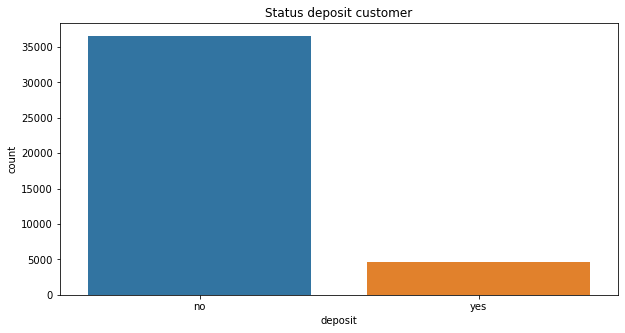

In [21]:
#visualisasi deposit
f, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x='deposit', data=df_bank)
plt.title('Status deposit customer')
plt.show()

In [22]:
#visualisasi 
df_job = df_bank.pivot_table(
    index='job',
    columns='education',
    values='age',
    aggfunc='count'
)
df_job

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,77,151,499,3329,1,363,5753,0
blue-collar,2318,1426,3623,878,8,453,94,0
entrepreneur,137,71,210,234,2,135,610,0
housemaid,474,77,94,174,1,59,139,0
management,100,85,166,298,0,89,2063,0
retired,597,75,145,276,3,241,285,0
self-employed,93,25,220,118,3,168,765,0
services,132,226,388,2682,0,218,173,0
student,26,13,99,357,0,43,170,0


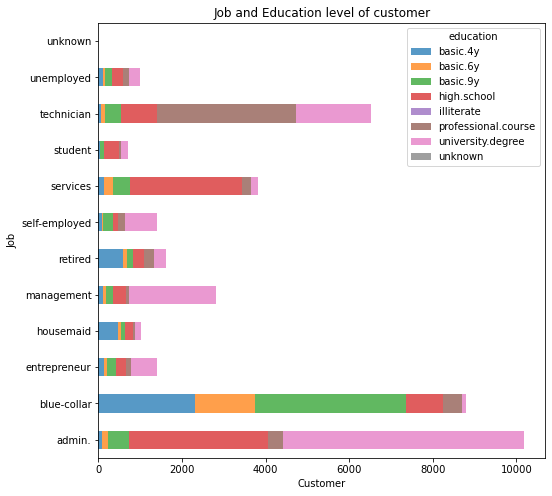

In [23]:
df_job.plot(kind='barh', stacked=True, figsize=(8, 8), alpha=0.75, legend=None)
plt.title('Job and Education level of customer')
plt.legend(title='education')
plt.ylabel('Job')
plt.xlabel('Customer')
plt.show()

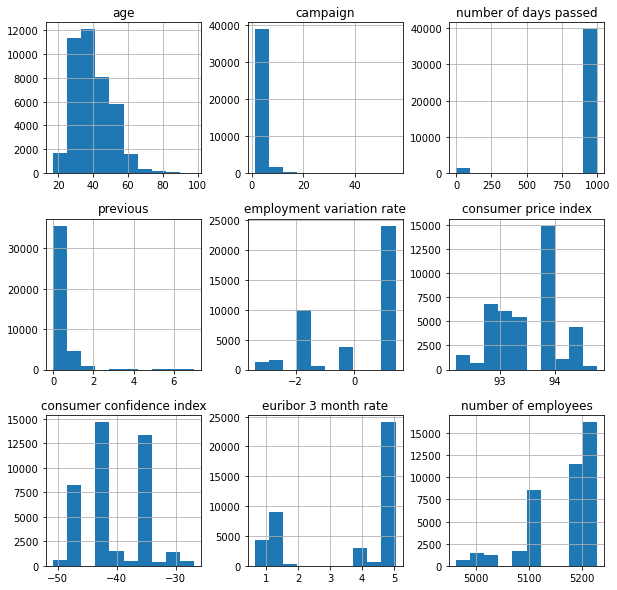

In [24]:
df_bank.hist(figsize=(10,10))
plt.show()

**Data Outliners**

In [25]:
df_1 = df_bank.copy()
shape_init = df_1.shape

#IQR = Q3 - Q1
#UL = Q3 + 1.5 * IQR
def uiqr(f):
    return df_1[f].quantile(q=0.75) + 1.5 * (df_1[f].quantile(q=0.75) - df_1[f].quantile(q=0.25))
    
def info_out(feature):
    count = df_1[df_1[feature] > uiqr(feature)][feature].count()
    print(feature.capitalize(), 'above', uiqr(feature), 'are outliers')
    print('Outliers: ' + str(count) + ' from ' + str(len(df_1)) + ' rows (' 
          + str(round(count*100/len(df_1), 2)) + '%)')

def rem_out(feature):
    global df_1
    info_out(feature)
    df_1 = df_1[df_1[feature] <= uiqr(feature)]
    print('Outliers removed.')
    print('-' * 40)

print('Initial data frame shape:', shape_init)
print('-' * 40)

columns_out = ['age', 'campaign']
for columns in columns_out:
    rem_out(columns)
    
shape_now = df_1.shape
row_diff = shape_init[0]-shape_now[0]
print('Current data frame shape:', shape_now)
print('Removed total ' + str(row_diff) + ' rows (' + str(round(row_diff*100/shape_init[0], 2)) + '%)')

Initial data frame shape: (41188, 20)
----------------------------------------
Age above 69.5 are outliers
Outliers: 469 from 41188 rows (1.14%)
Outliers removed.
----------------------------------------
Campaign above 6.0 are outliers
Outliers: 2392 from 40719 rows (5.87%)
Outliers removed.
----------------------------------------
Current data frame shape: (38327, 20)
Removed total 2861 rows (6.95%)


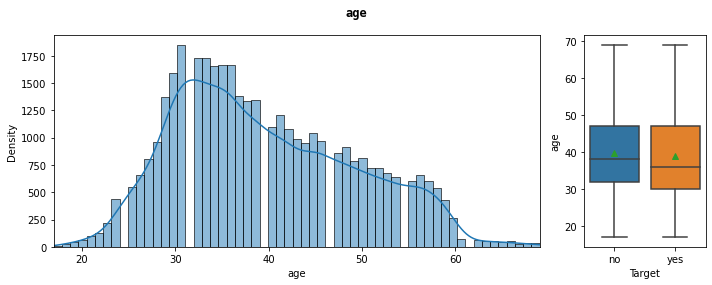

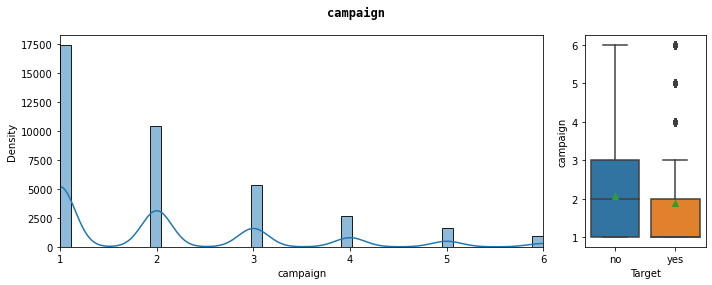

In [26]:
for columns in columns_out:
    fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [4, 1]}, figsize=(10, 4), tight_layout=True)
    fig.suptitle(columns, fontsize='large', fontweight='bold', family='monospace')

    sns.histplot(df_1[columns], ax=ax[0], kde=True)
    ax[0].set_ylabel('Density')
    ax[0].margins(x=0)

    sns.boxplot(ax=ax[1], x='deposit', y=columns, data=df_1, showmeans=True)
    ax[1].set_xlabel('Target')

    plt.show()

In [27]:
df_1['deposit'] = df_1['deposit'].replace({'yes': 1, 'no': 0})
columns_category.remove('deposit')

In [39]:
le = LabelEncoder()

df_1['job'] = le.fit_transform(df_1['job'])
df_1['marital'] = le.fit_transform(df_1['marital'])
df_1['education'] = le.fit_transform(df_1['education'])
df_1['housing'] = le.fit_transform(df_1['housing'])
df_1['loan'] = le.fit_transform(df_1['loan'])
df_1['contact'] = le.fit_transform(df_1['contact'])
df_1['month'] = le.fit_transform(df_1['month'])
df_1['day_of_week'] = le.fit_transform(df_1['day_of_week'])
df_1['deposit'] = le.fit_transform(df_1['deposit'])
df_1['credit default'] = le.fit_transform(df_1['credit default'])
df_1['poutcome'] = le.fit_transform(df_1['poutcome'])

In [40]:
df_1.head()

,age,job,marital,education,credit default,housing,loan,contact,month,day_of_week,campaign,number of days passed,previous,poutcome,employment variation rate,consumer price index,consumer confidence index,euribor 3 month rate,number of employees,deposit
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,2,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


**Splitting dan scalling data**

In [41]:
# Split Dataset
X = df_1.loc[:, df_bank.columns != 'deposit']
y = df_1['deposit']
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2,
    random_state=11
)
print("training size:", X_train.shape[0])
print("test size:", X_test.shape[0])


(38327, 19) (38327,)
training size: 30661
test size: 7666


## Modeling

In [51]:
from sklearn.metrics import plot_confusion_matrix

In [74]:
def train_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    train_acc = model.score(X_train, y_train)

    test_pred = model.predict(X_test)
    test_acc = model.score(X_test, y_test)
    
    print("==== training performance ====")
    print("accuracy score:", train_acc)
    print()
    print("==== test performance ====")
    print("accuracy score:", test_acc)
    
    print(classification_report(y_test, test_pred))
    print(confusion_matrix(y_test, test_pred))


**1. Logistic Regression**

In [75]:
logistic = LogisticRegression()

train_model(logistic, X_train, X_test, y_train, y_test)

==== training performance ====
accuracy score: 0.8994161964710871

==== test performance ====
accuracy score: 0.8977302374119489
              precision    recall  f1-score   support

           0       0.91      0.99      0.94      6807
           1       0.66      0.18      0.28       859

    accuracy                           0.90      7666
   macro avg       0.78      0.58      0.61      7666
weighted avg       0.88      0.90      0.87      7666

[[6729   78]
 [ 706  153]]


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

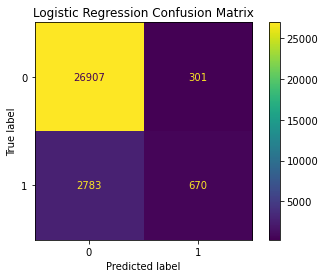

In [55]:
plot_confusion_matrix(logistic, X_train, y_train)

plt.title('Logistic Regression Confusion Matrix')

**2. KNN**

In [44]:
KNN = KNeighborsClassifier()

train_model(KNN, X_train, X_test, y_train, y_test)

==== training performance ====
accuracy score: 0.913179609275627

==== test performance ====
accuracy score: 0.8896425776154449
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6807
           1       0.51      0.27      0.35       859

    accuracy                           0.89      7666
   macro avg       0.71      0.62      0.65      7666
weighted avg       0.87      0.89      0.87      7666

[[6588  219]
 [ 627  232]]


Text(0.5, 1.0, 'K-Nearest Neighbour Confusion Matrix')

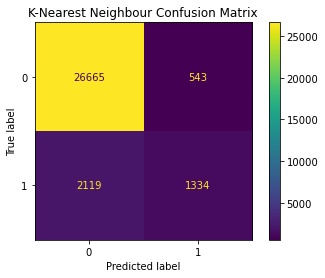

In [56]:
plot_confusion_matrix(KNN, X_train, y_train)

plt.title('K-Nearest Neighbour Confusion Matrix')

**3. SVM**

In [45]:
SVM = SVC()

train_model(SVM, X_train, X_test, y_train, y_test)

==== training performance ====
accuracy score: 0.8979811486905189

==== test performance ====
accuracy score: 0.8953822071484477
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      6807
           1       0.60      0.19      0.29       859

    accuracy                           0.90      7666
   macro avg       0.76      0.59      0.62      7666
weighted avg       0.87      0.90      0.87      7666

[[6699  108]
 [ 694  165]]


Text(0.5, 1.0, 'Support Vector Machine Confusion Matrix')

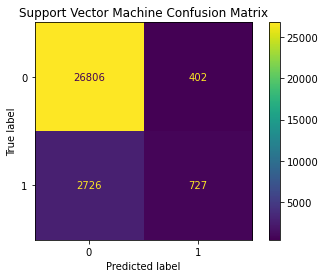

In [63]:
plot_confusion_matrix(SVM, X_train, y_train)

plt.title('Support Vector Machine Confusion Matrix')

**4. Naive Bayes**

In [46]:
NaiveBayes = GaussianNB()

train_model(NaiveBayes, X_train, X_test, y_train, y_test)

==== training performance ====
accuracy score: 0.8376439124620854

==== test performance ====
accuracy score: 0.8355074354291677
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      6807
           1       0.34      0.48      0.40       859

    accuracy                           0.84      7666
   macro avg       0.63      0.68      0.65      7666
weighted avg       0.86      0.84      0.85      7666

[[5993  814]
 [ 447  412]]


Text(0.5, 1.0, 'Naive Bayes Confusion Matrix')

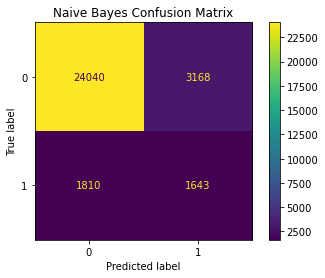

In [65]:
plot_confusion_matrix(NaiveBayes, X_train, y_train)

plt.title('Naive Bayes Confusion Matrix')

**5. Decision Tree**

In [64]:
Decision = DecisionTreeClassifier()

train_model(Decision, X_train, X_test, y_train, y_test)

==== training performance ====
accuracy score: 0.9946511855451551

==== test performance ====
accuracy score: 0.830028698147665
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      6807
           1       0.27      0.31      0.29       859

    accuracy                           0.83      7666
   macro avg       0.59      0.60      0.60      7666
weighted avg       0.84      0.83      0.83      7666

[[6100  707]
 [ 596  263]]


Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

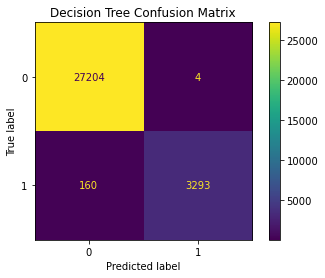

In [66]:
plot_confusion_matrix(Decision, X_train, y_train)

plt.title('Decision Tree Confusion Matrix')

**6. Random Forest**

In [48]:
RF = RandomForestClassifier()

train_model(RF, X_train, X_test, y_train, y_test)

==== training performance ====
accuracy score: 0.9946185708228694

==== test performance ====
accuracy score: 0.894077745890947
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      6807
           1       0.55      0.30      0.39       859

    accuracy                           0.89      7666
   macro avg       0.73      0.63      0.66      7666
weighted avg       0.88      0.89      0.88      7666

[[6599  208]
 [ 604  255]]


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

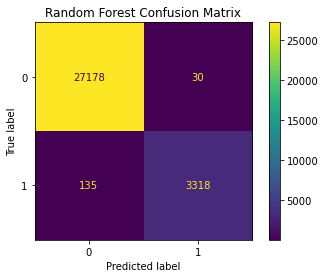

In [67]:
plot_confusion_matrix(RF, X_train, y_train)

plt.title('Random Forest Confusion Matrix')

**Analysis**

Berdasarkan test klasifikasi yang sudah dilakukan didapat hasil test accuracy sebagai berikut:
- Logistic Regression = 89.7%
- K-Nearest Neighbour = 88.9%
- Support Vector Machine = 89.5%
- Naive Bayes = 83.5%
- Decision Tree = 83%
- Random Forest = 89.4%

Jadi, klasifikasi terbaik yang dapat digunakan dalam case ini adalah Logistic Regression